In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)

(60000, 28, 28)


1


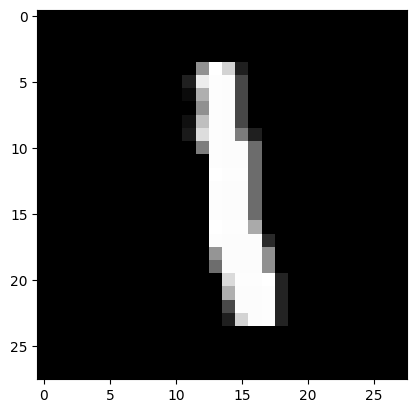

In [ ]:
print(y_train[6])
plt.imshow(X_train[6], cmap = 'gray')

In [ ]:
X_train_scaled = np.array([x.ravel()/255.for x in X_train])
X_test_scaled = np.array([x.ravel()/255.for x in X_test])

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(60000, 784)
(10000, 784)


In [ ]:
# #y_train_v = np.array(y_train)
# y_train_onehot = np.zeros((y_train.size, y_train.max()+1))
# y_train_onehot[np.arange(y_train.size),y_train]=1
# print(y_train_onehot)
# print(y_train_onehot[6])

In [ ]:
def one_hot (y,num_class):
  return np.eye(num_class)[y]

In [ ]:
y_train_onehot = one_hot(y_train, 10)
y_test_onehot = one_hot(y_test, 10)

In [ ]:
def predict(X, w):
  h = np.dot(X, w)
  softmax = np.exp(h)
  y_pred = softmax / np.sum(softmax, axis = 1, keepdims = True)
  return y_pred

def loss(X, w, y):
  y_pred = predict(X, w)
  return -np.sum(y * np.log(y_pred)) / y.shape[0]

def grad(X, w, y):
  y_pred = predict(X, w)
  delta = y_pred - y
  return np.dot(X.T, delta) / X.shape[0]

def gradient_descent(X, y, lr = 0.01, epochs = 1000):
  w = np.zeros((X.shape[1],10))
  losses = []
  for i in range(epochs):
    w = w - lr*grad(X, w, y)
    a = loss(X, w, y)
    losses.append(a)
  print(f'Loss cross entropy: {a}')
  return losses, w

In [ ]:
# def batch_generator(X, y, batch_size=32):
#   idx = np.arange(X.shape[0])
#   np.random.shuffle(idx)

#   n_batch = len(idx) // batch_size
#   for i in range(n_batch):
#     i_start = i * batch_size
#     i_stop = min((i+1) * batch_size, len(idx))
#     yield X[i_start:i_stop, :], y[i_start:i_stop, :]

In [ ]:
# def gradient_descent(X, w, y, lr = 0.01, epochs = 1500):
#   for i in range(epochs):
#     for X_batch, y_batch in batch_generator(X, y):
#       dw = grad(X_batch,w,y_batch)
#       w = w - lr*dw
#     print(f'Loss cross entropy: {loss(X,w,y)}')
#   return loss(X,w,y), w

Loss cross entropy: 0.6121305167099464


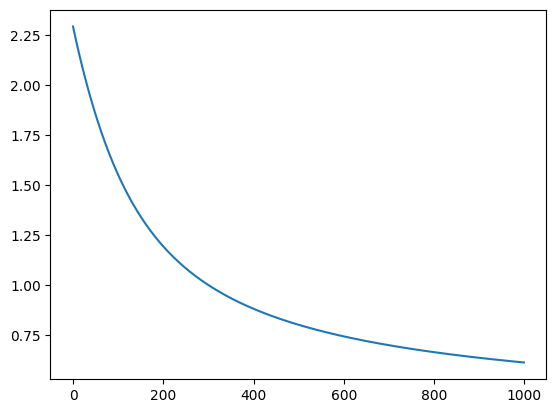

In [ ]:
l,w = gradient_descent(X_train_scaled, y_train_onehot)
plt.plot(l)

In [ ]:
def predict_classes(X,w):
  y_pred = predict(X,w)
  y_pred = np.argmax(y_pred, axis=1)
  return y_pred

In [ ]:
y_pred = predict_classes (X_test_scaled, w)

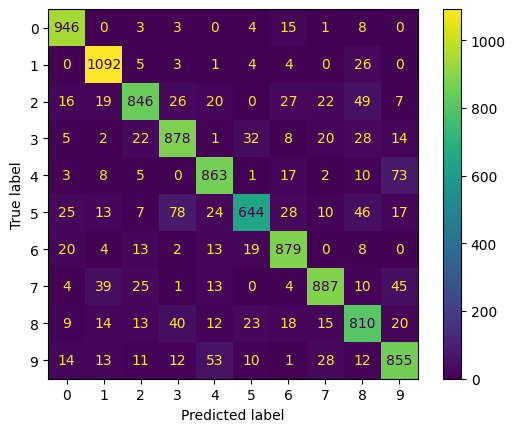

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
n_classes = cm.shape[0]
n_class = cm.shape[0] 
tp = np.zeros(n_class)
fn = np.zeros(n_class)
fp = np.zeros(n_class)
for i in range(n_class):
    tp[i] = cm[i][i]
    fn[i] = np.sum(cm[i]) - tp[i]
    fp[i] = np.sum(cm[:,i]) - tp[i]
    
accuracy = np.sum(tp) / np.sum(cm)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = (2 * recall * precision) / (precision + recall)

print(accuracy)
print(recall)
print(precision)
print(f1_score)


0.87
[0.96530612 0.96211454 0.81976744 0.86930693 0.87881874 0.72197309
 0.91753653 0.86284047 0.83162218 0.84737364]
[0.90786948 0.90697674 0.89052632 0.84180249 0.863      0.87381275
 0.87812188 0.90050761 0.80436941 0.82929195]
[0.93570722 0.93373236 0.85368315 0.85533366 0.87083754 0.79066912
 0.89739663 0.88127173 0.8177688  0.83823529]


Tao ham va confusion matrix 

In [ ]:
class multiclass:
  def __init__ (self, lr=0.01, epochs=500):
    self.lr = lr
    self.epochs = epochs
  
  def predict(self, X):
    h = np.dot(X, self.w)
    softmax = np.exp(h)
    y_pred = softmax / np.sum(softmax, axis = 1, keepdims = True)
    return y_pred

  def loss(self, X, y):
    y_pred = self.predict(X)
    return -np.sum(y * np.log(y_pred)) / y.shape[0]

  def grad(self, X, y):
    y_pred = self.predict(X)
    delta = y_pred - y
    return np.dot(X.T, delta) / X.shape[0]

  def gradient_descent(self, X, y):
    self.w = np.zeros((X.shape[1],10))
    self.losses = []
    for i in range(self.epochs):
      self.w = self.w - self.lr*self.grad(X, y)
      a = self.loss(X, y)
      self.losses.append(a)
    print(f'Loss cross entropy: {a}')

  def predict_classes(self, X):
    y_pred = self.predict(X)
    y_pred = np.argmax(y_pred, axis=1)
    return y_pred
  

  


Loss cross entropy: 0.4638430069571307


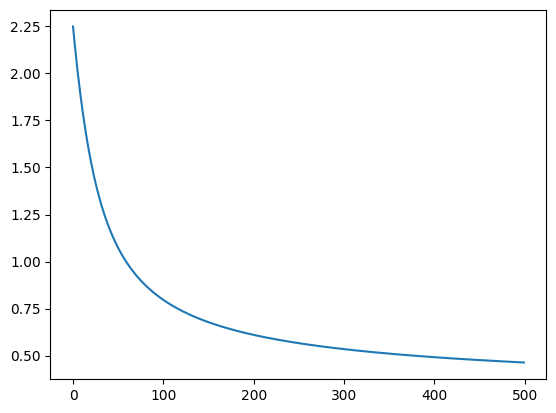

In [ ]:
model = multiclass(lr=0.05, epochs=500)
model.gradient_descent(X_train_scaled, y_train_onehot)
y_pred = predict_classes (X_test_scaled, w)

plt.plot(model.losses)


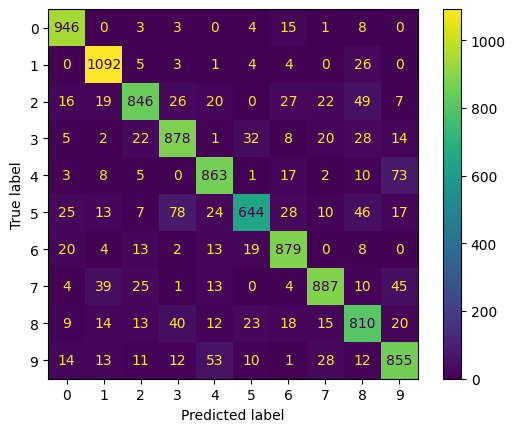

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

Act3: Thêm bias

In [ ]:
ones = np.ones((X_train_scaled.shape[0], 1))
X_train_new = np.hstack((ones, X_train_scaled))
X_train_new.shape

(60000, 785)

In [ ]:
def predict(X, w):
  h = np.dot(X, w)
  softmax = np.exp(h)
  y_pred = softmax / np.sum(softmax, axis = 1, keepdims = True)
  return y_pred

def loss(X, w, y):
  y_pred = predict(X, w)
  return -np.sum(y * np.log(y_pred)) / y.shape[0]

def grad(X, w, y):
  y_pred = predict(X, w)
  delta = y_pred - y
  return np.dot(X.T, delta) / X.shape[0]

def gradient_descent(X, y, lr = 0.05, epochs = 500):
  w = np.zeros((X_train_new.shape[1],10))
  losses = []
  for i in range(epochs):
    w = w - lr*grad(X, w, y)
    a = loss(X, w, y)
    losses.append(a)
  print(f'Loss cross entropy: {a}')
  return losses, w

Loss cross entropy: 0.4611237054684871


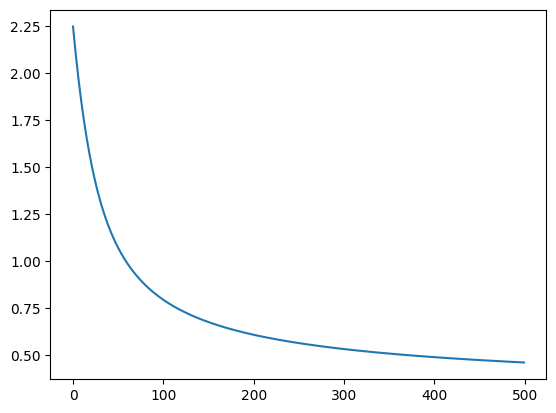

In [ ]:
l,w = gradient_descent(X_train_new,y_train_onehot)
plt.plot(l)

In [ ]:
X_test_new = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))
X_test_new.shape

(10000, 785)

In [ ]:
def predict_classes(X,w):
  y_pred = predict(X,w)
  y_pred = np.argmax(y_pred, axis=1)
  return y_pred

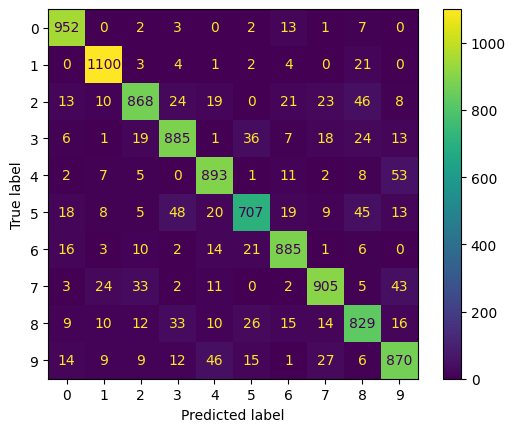

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = predict_classes (X_test_new, w)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
n_classes = cm.shape[0]
n_class = cm.shape[0] 
tp = np.zeros(n_class)
fn = np.zeros(n_class)
fp = np.zeros(n_class)
for i in range(n_class):
  tp[i] = cm[i][i]
  fn[i] = np.sum(cm[i]) - tp[i]
  fp[i] = np.sum(cm[:,i]) - tp[i]
    
accuracy = np.sum(tp) / np.sum(cm)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = (2 * recall * precision) / (precision + recall)

print("Accuracy: ",accuracy)
print("Recall: ",recall)
print("Precision: ", precision)
print("f1_score: ", f1_score)


Accuracy:  0.8894
Recall:  [0.97142857 0.969163   0.84108527 0.87623762 0.90936864 0.7926009
 0.92379958 0.88035019 0.85112936 0.86223984]
Precision:  [0.92158761 0.93856655 0.89855072 0.87364265 0.87980296 0.87283951
 0.90490798 0.905      0.83149448 0.85629921]
f1_score:  [0.94585196 0.95361942 0.86886887 0.87493821 0.89434151 0.83078731
 0.9142562  0.89250493 0.84119736 0.85925926]
